In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('data/smartphonesmessy.csv')

In [3]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [4]:
df.shape

(1020, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [6]:
df.isna().sum()/len(df)*100

model         0.000000
price         0.000000
rating       13.823529
sim           0.000000
processor     0.000000
ram           0.000000
battery       0.000000
display       0.000000
camera        0.098039
card          0.686275
os            1.666667
dtype: float64

In [7]:
# Se suprime la lera R con el que inicia cada valor de la variable 'price'
df['price']=df['price'].str[1:]
'''
Se convierte la variable 'price' a float (usando REGEX: realizando match con cualquier simbolo DIFERENTE a punto o digito) y se guarda 
en la nueva variable price_€
'''
df['price_€']= df['price'].replace('[^\d.]', '', regex=True).astype(float)


In [8]:
df.drop(['price'], axis=1, inplace=True) #Suprimimos la variable 'price'

In [9]:
# Realizamos la conversion de Rupias a Euros multiplicando la variable 'price_€' por 0.11 (factor conversor al dia de hoy)
df['price_€']=df['price_€']*0.011

In [10]:
# Guardamos los cambios en el nuevo achivo llamado moviles.csv  
df.to_csv('moviles.csv', index=False)

In [11]:
df1 = pd.read_csv('moviles.csv')
df1.head(2)


,model,rating,sim,processor,ram,battery,display,camera,card,os,price_€
0,OnePlus 11 5G,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,604.989
1,OnePlus Nord CE 2 Lite 5G,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,219.879


In [12]:
df.describe()

,rating,price_€
count,879.000000,1020.000000
mean,78.258248,345.089444
std,7.402854,430.858368
min,60.000000,1.089000
25%,74.000000,137.106750
50%,80.000000,217.965000
75%,84.000000,384.989000
max,89.000000,7150.000000


In [13]:
# funciones

def gigas_a_megas(x):
    '''
Conversor de unidades, de GB a MB a partir de una lista que nos devuelve una serie de valores ya identificados, es decir, los menores a 20 
son valores que tienen una unidad de GB y deben ser convertidos
'''
    if x < 20:
        return x*1024
    else:
        return x
    

def convertir_a_MB(expression):
    '''
Convierte un numero a MB a partir de una columna que nos entrega un STR compuesto por un valor numerico y una unidad en MB, GB o TB. 

'''
    match = re.search(r'(\d+)\s*([GBTM]+)', expression)
    if match:
        num, unid = match.groups()
        num = int(num)
        if unid == 'GB':
            return num * 1024
        elif unid == 'TB':
            return num * 1024 * 1024
        elif unid == 'MB':
            return num
    return None


def extraer_info(descripcion):
    '''
Se pretende extraer la informacion de la variable 'processor' por medio de REGEX, para ello generamos 3 subgrupos que guardaremos en variables 
independientes 'nombre','nucleo','velocidad'. 

'''
    match = re.search(r'([A-Za-z0-9\s\+]+),\s*(\w+\s*\w*),\s*([\d.]+\s*GHz)\s*Processor', descripcion)
    if match:
        nombre, nucleos, velocidad = match.groups()
        return pd.Series({'proc_nombre': nombre.strip(), 'proc_nucleos': nucleos.strip(), 'proc_velocidad': velocidad.strip()})
    return pd.Series({'proc_nombre': None, 'proc_nucleos': None, 'proc_velocidad': None})



In [ ]:
'''
Vamos a encontrar datos que no pertenezcan a las columnas, es decir, hay datos que estan en columnas erradas y trataremos de corregir esta
anomalia, lo que nos permite reducir el numero de nulos en nuestras variables.
'''

In [15]:
# Hacemos cacmbio de valores que aparecen en la columna 'os' pero que realmente deberian aparecer en la columna 'card'
condicion = df1['os'] == 'No FM Radio'
df1.loc[condicion, ['os', 'card']] = df1.loc[condicion, ['card', 'os']].values

condicion1 = df1['os'] == 'Memory Card Not Supported'
df1.loc[condicion1, ['os', 'card']] = df1.loc[condicion1, ['card', 'os']].values

condicion2 = df1['os'] == 'Memory Card Supported, upto 32 GB'
df1.loc[condicion2, ['os', 'card']] = df1.loc[condicion2, ['card', 'os']].values

condicion3 = df1['os'] == 'Memory Card (Hybrid), upto 2 TB'
df1.loc[condicion3, ['os', 'card']] = df1.loc[condicion3, ['card', 'os']].values

condicion4 = df1['os'] == 'Memory Card Supported, upto 64 GB'
df1.loc[condicion4, ['os', 'card']] = df1.loc[condicion4, ['card', 'os']].values

condicion5 = df1['os'] == 'Memory Card (Hybrid), upto 256 GB'
df1.loc[condicion5, ['os', 'card']] = df1.loc[condicion5, ['card', 'os']].values

condicion6 = df1['os'] == 'Memory Card Supported, upto 256 GB'
df1.loc[condicion6, ['os', 'card']] = df1.loc[condicion6, ['card', 'os']].values

condicion7 = df1['os'] == 'Memory Card Supported, upto 128 GB'
df1.loc[condicion7, ['os', 'card']] = df1.loc[condicion7, ['card', 'os']].values

condicion8 = df1['os'] == 'Memory Card (Hybrid)'
df1.loc[condicion8, ['os', 'card']] = df1.loc[condicion8, ['card', 'os']].values

condicion9 = df1['os'] == 'Memory Card Supported, upto 16 GB'
df1.loc[condicion9, ['os', 'card']] = df1.loc[condicion9, ['card', 'os']].values

condicion10 = df1['os'] == 'Memory Card Supported'
df1.loc[condicion10, ['os', 'card']] = df1.loc[condicion10, ['card', 'os']].values

#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'os' pero que realmente deberian aparecer en la columna 'camera'

condicion = df1['os'] == '0.3 MP Rear Camera'
df1.loc[condicion, ['os', 'camera']] = df1.loc[condicion, ['camera', 'os']].values

condicion1 = df1['os'] == '1.3 MP Rear Camera'
df1.loc[condicion1, ['os', 'camera']] = df1.loc[condicion1, ['camera', 'os']].values

condicion2 = df1['os'] == '50 MP + 8 MP Dual Rear & 32 MP Front Camera'
df1.loc[condicion2, ['os', 'camera']] = df1.loc[condicion2, ['camera', 'os']].values

condicion3 = df1['os'] == '5 MP Rear & 2 MP Front Camera'
df1.loc[condicion3, ['os', 'camera']] = df1.loc[condicion3, ['camera', 'os']].values

condicion4 = df1['os'] == '50 MP + 13 MP + 8 MP Triple Rear & 10.7 MP Front Camera'
df1.loc[condicion4, ['os', 'camera']] = df1.loc[condicion4, ['camera', 'os']].values

condicion5 = df1['os'] == '50 MP + 13 MP + 5 MP Triple Rear & 12 MP Front Camera'
df1.loc[condicion5, ['os', 'camera']] = df1.loc[condicion5, ['camera', 'os']].values

condicion6 = df1['os'] == '64 MP + 13 MP + 0.3 MP Triple Rear & 10 MP Front Camera'
df1.loc[condicion6, ['os', 'camera']] = df1.loc[condicion6, ['camera', 'os']].values

condicion7 = df1['os'] == '64 MP + 20 MP + 2 MP Triple Rear & Main Front Camera'
df1.loc[condicion7, ['os', 'camera']] = df1.loc[condicion7, ['camera', 'os']].values

condicion8 = df1['os'] == '64 MP + 13 MP + 12 MP Triple Rear & 32 MP Front Camera'
df1.loc[condicion8, ['os', 'camera']] = df1.loc[condicion8, ['camera', 'os']].values

condicion9 = df1['os'] == '2 MP Rear Camera'
df1.loc[condicion9, ['os', 'camera']] = df1.loc[condicion9, ['camera', 'os']].values

condicion10 = df1['os'] == '50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32 MP Dual Front Camera'
df1.loc[condicion10, ['os', 'camera']] = df1.loc[condicion10, ['camera', 'os']].values

condicion11 = df1['os'] == '5 MP Rear Camera'
df1.loc[condicion11, ['os', 'camera']] = df1.loc[condicion11, ['camera', 'os']].values

condicion12 = df1['os'] == '48 MP Quad Rear Camera'
df1.loc[condicion12, ['os', 'camera']] = df1.loc[condicion12, ['camera', 'os']].values

condicion13 = df1['os'] == '64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front Camera'
df1.loc[condicion13, ['os', 'camera']] = df1.loc[condicion13, ['camera', 'os']].values

condicion14 = df1['os'] == '12 MP + 12 MP Dual Rear & 10 MP Front Camera'
df1.loc[condicion14, ['os', 'camera']] = df1.loc[condicion14, ['camera', 'os']].values

#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'os' pero que realmente deberian aparecer en la columna 'display'

condicion = df1['os'] == '2.4 inches, 240 x 320 px Display'
df1.loc[condicion, ['os', 'display']] = df1.loc[condicion, ['display', 'os']].values

condicion1 = df1['os'] == '2.8 inches, 240 x 320 px Display'
df1.loc[condicion1, ['os', 'display']] = df1.loc[condicion1, ['display', 'os']].values

condicion2 = df1['os'] == '1.8 inches, 128 x 160 px Display'
df1.loc[condicion2, ['os', 'display']] = df1.loc[condicion2, ['display', 'os']].values

condicion3 = df1['os'] == '1.77 inches, 240 x 320 px Display'
df1.loc[condicion3, ['os', 'display']] = df1.loc[condicion3, ['display', 'os']].values

#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'os' pero que realmente deberian aparecer en la columna 'battery'
condicion = df1['os'] == '1450 mAh Battery'
df1.loc[condicion, ['os', 'battery']] = df1.loc[condicion, ['battery', 'os']].values

condicion1 = df1['os'] == '1200 mAh Battery'
df1.loc[condicion1, ['os', 'battery']] = df1.loc[condicion1, ['battery', 'os']].values

condicion2 = df1['os'] == '3000 mAh Battery'
df1.loc[condicion2, ['os', 'battery']] = df1.loc[condicion2, ['battery', 'os']].values

condicion3 = df1['os'] == '1900 mAh Battery'
df1.loc[condicion3, ['os', 'battery']] = df1.loc[condicion3, ['battery', 'os']].values

condicion4 = df1['os'] == '800 mAh Battery'
df1.loc[condicion4, ['os', 'battery']] = df1.loc[condicion4, ['battery', 'os']].values

#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'os' pero que realmente deberian aparecer en la columna 'ram'

condicion = df1['os'] == '48 MB RAM, 128 MB inbuilt'
df1.loc[condicion, ['os', 'ram']] = df1.loc[condicion, ['ram', 'os']].values

condicion1 = df1['os'] == '32 MB RAM, 32 MB inbuilt'
df1.loc[condicion1, ['os', 'ram']] = df1.loc[condicion1, ['ram', 'os']].values

condicion2 = df1['os'] == '64 MB RAM, 128 MB inbuilt'
df1.loc[condicion2, ['os', 'ram']] = df1.loc[condicion2, ['ram', 'os']].values

#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'os' pero que realmente deberian aparecer en la columna 'processor'

condicion = df1['os'] == 'Dual Core, 500 MHz Processor'
df1.loc[condicion, ['os', 'processor']] = df1.loc[condicion, ['processor', 'os']].values



In [16]:
# Hacemos cacmbio de valores que aparecen en la columna 'card' pero que realmente deberian aparecer en la columna 'os'
condicion = df1['card'] == 'Android v12'
df1.loc[condicion, ['os', 'card']] = df1.loc[condicion, ['card', 'os']].values

condicion1 = df1['card'] == 'Android v11'
df1.loc[condicion1, ['os', 'card']] = df1.loc[condicion1, ['card', 'os']].values

condicion2 = df1['card'] == 'Android v13'
df1.loc[condicion2, ['os', 'card']] = df1.loc[condicion2, ['card', 'os']].values

condicion3 = df1['card'] == 'Android v9.0 (Pie)'
df1.loc[condicion3, ['os', 'card']] = df1.loc[condicion3, ['card', 'os']].values

#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'card' pero que realmente deberian aparecer en la columna 'camera'
condicion = df1['card'] == '50 MP Quad Rear & 16 MP Front Camera'
df1.loc[condicion, ['camera', 'card']] = df1.loc[condicion, ['card', 'camera']].values

condicion1 = df1['card'] == '50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 MP Dual Front Camera'
df1.loc[condicion1, ['camera', 'card']] = df1.loc[condicion1, ['card', 'camera']].values

condicion2 = df1['card'] == '50 MP + 16 MP + 13 MP Triple Rear & 32 MP Front Camera'
df1.loc[condicion2, ['camera', 'card']] = df1.loc[condicion2, ['card', 'camera']].values

condicion3 = df1['card'] == '64 MP + 16 MP + 12 MP Triple Rear & 16 MP Front Camera'
df1.loc[condicion3, ['camera', 'card']] = df1.loc[condicion3, ['card', 'camera']].values

condicion4 = df1['card'] == '50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front Camera'
df1.loc[condicion4, ['camera', 'card']] = df1.loc[condicion4, ['card', 'camera']].values

condicion5 = df1['card'] == '12 MP + 12 MP + 12 MP Triple Rear & 10 MP + 4 MP Dual Front Camera'
df1.loc[condicion5, ['camera', 'card']] = df1.loc[condicion5, ['card', 'camera']].values

condicion6 = df1['card'] == '50 MP Quad Rear & 16 MP + 16 MP Dual Front Camera'
df1.loc[condicion6, ['camera', 'card']] = df1.loc[condicion6, ['card', 'camera']].values

condicion7 = df1['card'] == '64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front Camera'
df1.loc[condicion7, ['camera', 'card']] = df1.loc[condicion7, ['card', 'camera']].values

condicion8 = df1['card'] == '50 MP + 50 MP + 10 MP Triple Rear & 32 MP Front Camera'
df1.loc[condicion8, ['camera', 'card']] = df1.loc[condicion8, ['card', 'camera']].values


condicion9 = df1['card'] == '108 MP + 13 MP + 8 MP Triple Rear & 20 MP Front Camera'
df1.loc[condicion9, ['camera', 'card']] = df1.loc[condicion9, ['card', 'camera']].values


In [17]:
# Hacemos cacmbio de valores que aparecen en la columna 'display' pero que realmente deberian aparecer en la columna 'camera'

condicion = df1['display'] == '2 MP + 12 MP Dual Rear & 12 MP Front Camera'
df1.loc[condicion, ['camera', 'display']] = df1.loc[condicion, ['display', 'camera']].values

condicion1 = df1['display'] == '12 MP Rear & 7 MP Front Camera'
df1.loc[condicion1, ['camera', 'display']] = df1.loc[condicion1, ['display', 'camera']].values

condicion2 = df1['display'] == '50 MP + 12 MP + 12 MP Triple Rear & 12 MP Front Camera'
df1.loc[condicion2, ['camera', 'display']] = df1.loc[condicion2, ['display', 'camera']].values

condicion3 = df1['display'] == '2 MP Rear & 0.3 MP Front Camera'
df1.loc[condicion3, ['camera', 'display']] = df1.loc[condicion3, ['display', 'camera']].values

condicion4 = df1['display'] == '12 MP + 12 MP + 12 MP Triple Rear & 12 MP Front Camera'
df1.loc[condicion4, ['camera', 'display']] = df1.loc[condicion4, ['display', 'camera']].values

condicion5 = df1['display'] == 'No Rear Camera'
df1.loc[condicion5, ['camera', 'display']] = df1.loc[condicion5, ['display', 'camera']].values

condicion6 = df1['display'] == '12 MP Rear & 10.8 MP Front Camera'
df1.loc[condicion6, ['camera', 'display']] = df1.loc[condicion6, ['display', 'camera']].values

condicion7 = df1['display'] == '2 MP Rear Camera'
df1.loc[condicion7, ['camera', 'display']] = df1.loc[condicion7, ['display', 'camera']].values

condicion8 = df1['display'] == '0.3 MP Rear Camera'
df1.loc[condicion8, ['camera', 'display']] = df1.loc[condicion8, ['display', 'camera']].values

condicion9 = df1['display'] == '12 MP + 12 MP Dual Rear & 12 MP Front Camera'
df1.loc[condicion9, ['camera', 'display']] = df1.loc[condicion9, ['display', 'camera']].values

#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'display' pero que realmente deberian aparecer en la columna 'os'
condicion = df1['display'] == 'iOS v12'
df1.loc[condicion, ['display', 'os']] = df1.loc[condicion, ['os', 'display']].values

condicion1 = df1['display'] == 'Android v5.0 (Lollipop)'
df1.loc[condicion1, ['display', 'os']] = df1.loc[condicion1, ['os', 'display']].values

#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'display' pero que realmente deberian aparecer en la columna 'card'

condicion = df1['display'] == 'Memory Card Not Supported'
df1.loc[condicion, ['card', 'display']] = df1.loc[condicion, ['display', 'card']].values

condicion1 = df1['display'] == 'Memory Card Supported, upto 32 GB'
df1.loc[condicion1, ['card', 'display']] = df1.loc[condicion1, ['display', 'card']].values

condicion2 = df1['display'] == 'Memory Card Supported, upto 64 GB'
df1.loc[condicion2, ['card', 'display']] = df1.loc[condicion2, ['display', 'card']].values

condicion3 = df1['display'] == 'Memory Card Supported, upto 16 GB'
df1.loc[condicion3, ['card', 'display']] = df1.loc[condicion3, ['display', 'card']].values

condicion4 = df1['display'] == 'Memory Card Supported'
df1.loc[condicion4, ['card', 'display']] = df1.loc[condicion4, ['display', 'card']].values

condicion5 = df1['display'] == 'Memory Card Supported, upto 128 GB'
df1.loc[condicion5, ['card', 'display']] = df1.loc[condicion5, ['display', 'card']].values


In [18]:
# Hacemos cacmbio de valores que aparecen en la columna 'battery' pero que realmente deberian aparecer en la columna 'camera'

condicion = df1['battery'] == '5 MP Rear & 5 MP Front Camera'
df1.loc[condicion, ['camera', 'battery']] = df1.loc[condicion, ['battery', 'camera']].values

condicion1 = df1['battery'] == 'No Rear Camera'
df1.loc[condicion1, ['camera', 'battery']] = df1.loc[condicion1, ['battery', 'camera']].values

condicion2 = df1['battery'] == '0.3 MP Rear & 0.3 MP Front Camera'
df1.loc[condicion2, ['camera', 'battery']] = df1.loc[condicion2, ['battery', 'camera']].values

condicion3 = df1['battery'] == '8 MP Rear & 1.2 MP Front Camera'
df1.loc[condicion3, ['camera', 'battery']] = df1.loc[condicion3, ['battery', 'camera']].values

#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'battery' pero que realmente deberian aparecer en la columna 'battery'

condicion = df1['battery'] == '6.1 inches, 1170 x 2532 px Display with Large Notch'
df1.loc[condicion, ['display', 'battery']] = df1.loc[condicion, ['battery', 'display']].values

condicion1 = df1['battery'] == '5.4 inches, 1080 x 2340 px Display'
df1.loc[condicion1, ['display', 'battery']] = df1.loc[condicion1, ['battery', 'display']].values

condicion2 = df1['battery'] == '4.7 inches, 750 x 1334 px Display'
df1.loc[condicion2, ['display', 'battery']] = df1.loc[condicion2, ['battery', 'display']].values

condicion3 = df1['battery'] == '6.06 inches, 1170 x 2532 px, 120 Hz Display with Punch Hole'
df1.loc[condicion3, ['display', 'battery']] = df1.loc[condicion3, ['battery', 'display']].values

condicion4 = df1['battery'] == '4 inches, 720 x 1280 px Display'
df1.loc[condicion4, ['display', 'battery']] = df1.loc[condicion4, ['battery', 'display']].values

condicion5 = df1['battery'] == '1.77 inches, 128 x 160 px Display'
df1.loc[condicion5, ['display', 'battery']] = df1.loc[condicion5, ['battery', 'display']].values

condicion6 = df1['battery'] == '1.8 inches, 160 x 128 px Display'
df1.loc[condicion6, ['display', 'battery']] = df1.loc[condicion6, ['battery', 'display']].values

condicion7 = df1['battery'] == '0.49 inches, 64 x 32 px Display'
df1.loc[condicion7, ['display', 'battery']] = df1.loc[condicion7, ['battery', 'display']].values

condicion8 = df1['battery'] == '1.8 inches, 128 x 160 px Display'
df1.loc[condicion8, ['display', 'battery']] = df1.loc[condicion8, ['battery', 'display']].values

condicion9 = df1['battery'] == '6.1 inches, 750 x 1580 px Display'
df1.loc[condicion9, ['display', 'battery']] = df1.loc[condicion9, ['battery', 'display']].values

condicion10 = df1['battery'] == '2.4 inches, 240 x 320 px Display'
df1.loc[condicion10, ['display', 'battery']] = df1.loc[condicion10, ['battery', 'display']].values

condicion11 = df1['battery'] == '1.5 inches, 128 x 128 px Display'
df1.loc[condicion11, ['display', 'battery']] = df1.loc[condicion11, ['battery', 'display']].values

condicion12 = df1['battery'] == '2.4 inches, 240 x 360 px Display'
df1.loc[condicion12, ['display', 'battery']] = df1.loc[condicion12, ['battery', 'display']].values

condicion13 = df1['battery'] == '2.8 inches, 240 x 320 px Display'
df1.loc[condicion13, ['display', 'battery']] = df1.loc[condicion13, ['battery', 'display']].values

#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'battery' pero que realmente deberian aparecer en la columna 'os'

condicion = df1['battery'] == 'Kaios v3.0'
df1.loc[condicion, ['os', 'battery']] = df1.loc[condicion, ['battery', 'os']].values


In [19]:
# Hacemos cacmbio de valores que aparecen en la columna 'ram' pero que realmente deberian aparecer en la columna 'battery'

condicion = df1['ram'] == '1200 mAh Battery'
df1.loc[condicion, ['battery', 'ram']] = df1.loc[condicion, ['ram', 'battery']].values

condicion1 = df1['ram'] == '800 mAh Battery'
df1.loc[condicion1, ['battery', 'ram']] = df1.loc[condicion1, ['ram', 'battery']].values

condicion2 = df1['ram'] == '1470 mAh Battery'
df1.loc[condicion2, ['battery', 'ram']] = df1.loc[condicion2, ['ram', 'battery']].values

condicion3 = df1['ram'] == '1800 mAh Battery'
df1.loc[condicion3, ['battery', 'ram']] = df1.loc[condicion3, ['ram', 'battery']].values

condicion4 = df1['ram'] == '200 mAh Battery'
df1.loc[condicion4, ['battery', 'ram']] = df1.loc[condicion4, ['ram', 'battery']].values

condicion5 = df1['ram'] == '1750 mAh Battery'
df1.loc[condicion5, ['battery', 'ram']] = df1.loc[condicion5, ['ram', 'battery']].values

condicion6 = df1['ram'] == '1325 mAh Battery'
df1.loc[condicion6, ['battery', 'ram']] = df1.loc[condicion6, ['ram', 'battery']].values

condicion7 = df1['ram'] == '1000 mAh Battery'
df1.loc[condicion7, ['battery', 'ram']] = df1.loc[condicion7, ['ram', 'battery']].values
 

#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'ram' pero que realmente deberian aparecer en la columna 'display'

condicion = df1['ram'] == '4 inches, 640 x 1136 px Display'
df1.loc[condicion, ['display', 'ram']] = df1.loc[condicion, ['ram', 'display']].values

condicion1 = df1['ram'] == '2.4 inches, 240 x 320 px Display'
df1.loc[condicion1, ['display', 'ram']] = df1.loc[condicion1, ['ram', 'display']].values

condicion2 = df1['ram'] == '1.5 inches, 120 x 120 px Display'
df1.loc[condicion2, ['display', 'ram']] = df1.loc[condicion2, ['ram', 'display']].values

condicion3 = df1['ram'] == '3.6 inches, 240 x 320 px Display'
df1.loc[condicion3, ['display', 'ram']] = df1.loc[condicion3, ['ram', 'display']].values


#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'ram' pero que realmente deberian aparecer en la columna 'processor'

condicion = df1['ram'] == 'Single Core, 208 MHz Processor'
df1.loc[condicion, ['processor', 'ram']] = df1.loc[condicion, ['ram', 'processor']].values


In [20]:
# Hacemos cacmbio de valores que aparecen en la columna 'processor' pero que realmente deberian aparecer en la columna 'ram'

condicion = df1['processor'] == '1 GB RAM, 4 GB inbuilt'
df1.loc[condicion, ['processor', 'ram']] = df1.loc[condicion, ['ram', 'processor']].values

condicion1 = df1['processor'] == '32 MB RAM, 32 MB inbuilt'
df1.loc[condicion1, ['ram', 'processor']] = df1.loc[condicion1, ['processor', 'ram']].values

condicion2 = df1['processor'] == '256 MB RAM, 512 MB inbuilt'
df1.loc[condicion2, ['ram', 'processor']] = df1.loc[condicion2, ['processor', 'ram']].values

condicion3 = df1['processor'] == '48 MB RAM, 128 MB inbuilt'
df1.loc[condicion3, ['ram', 'processor']] = df1.loc[condicion3, ['processor', 'ram']].values

condicion4 = df1['processor'] == '8 MB RAM, 16 MB inbuilt'
df1.loc[condicion4, ['ram', 'processor']] = df1.loc[condicion4, ['processor', 'ram']].values

condicion5 = df1['processor'] == '4 MB RAM, 4 MB inbuilt'
df1.loc[condicion5, ['ram', 'processor']] = df1.loc[condicion5, ['processor', 'ram']].values

condicion6 = df1['processor'] == '1 GB RAM, 8 GB inbuilt'
df1.loc[condicion6, ['ram', 'processor']] = df1.loc[condicion6, ['processor', 'ram']].values

condicion7 = df1['processor'] == '52 MB RAM, 32 MB inbuilt'
df1.loc[condicion7, ['ram', 'processor']] = df1.loc[condicion7, ['processor', 'ram']].values

condicion8 = df1['processor'] == '32 GB inbuilt'
df1.loc[condicion8, ['ram', 'processor']] = df1.loc[condicion8, ['processor', 'ram']].values

#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'processor' pero que realmente deberian aparecer en la columna 'battery'
condicion = df1['processor'] == '1450 mAh Battery'
df1.loc[condicion, ['battery', 'processor']] = df1.loc[condicion, ['processor', 'battery']].values

condicion1 = df1['processor'] == '800 mAh Battery'
df1.loc[condicion1, ['battery', 'processor']] = df1.loc[condicion1, ['processor', 'battery']].values

condicion2 = df1['processor'] == '2000 mAh Battery'
df1.loc[condicion2, ['battery', 'processor']] = df1.loc[condicion2, ['processor', 'battery']].values


#--------------------------------------------------------------------------------------------------------------------------------

# Hacemos cacmbio de valores que aparecen en la columna 'processor' pero que realmente deberian aparecer en la columna 'os'
condicion = df1['processor'] == 'No Wifi'
df1.loc[condicion, ['os', 'processor']] = df1.loc[condicion, ['processor', 'os']].values

condicion1 = df1['processor'] == 'No 3G'
df1.loc[condicion1, ['os', 'processor']] = df1.loc[condicion1, ['processor', 'os']].values


In [21]:
# Hacemos cacmbio de valores que aparecen en la columna 'camera' pero que realmente deberian aparecer en la columna 'card'
condicion = df1['camera'] == 'Memory Card Supported, upto 32 GB	'
df1.loc[condicion, ['card', 'camera']] = df1.loc[condicion, ['camera', 'card']].values

In [22]:
# Hacemos cacmbio de valores que aparecen en la columna 'XXXXX' pero que realmente deberian aparecer en la columna 'XXXXX'

condicion = df1['display'] == ''
df1.loc[condicion, ['card', 'display']] = df1.loc[condicion, ['display', 'card']].values

condicion1 = df1['display'] == ''
df1.loc[condicion1, ['card', 'display']] = df1.loc[condicion1, ['display', 'card']].values

condicion2 = df1['display'] == ''
df1.loc[condicion2, ['card', 'display']] = df1.loc[condicion2, ['display', 'card']].values

condicion3 = df1['display'] == ''
df1.loc[condicion3, ['card', 'display']] = df1.loc[condicion3, ['display', 'card']].values

condicion4 = df1['display'] == ''
df1.loc[condicion4, ['card', 'display']] = df1.loc[condicion4, ['display', 'card']].values

condicion5 = df1['display'] == ''
df1.loc[condicion5, ['card', 'display']] = df1.loc[condicion5, ['display', 'card']].values

condicion6 = df1['display'] == ''
df1.loc[condicion6, ['card', 'display']] = df1.loc[condicion6, ['display', 'card']].values

condicion7 = df1['display'] == ''
df1.loc[condicion7, ['card', 'display']] = df1.loc[condicion7, ['display', 'card']].values

condicion8 = df1['display'] == ''
df1.loc[condicion8, ['card', 'display']] = df1.loc[condicion8, ['display', 'card']].values

condicion9 = df1['display'] == ''
df1.loc[condicion9, ['card', 'display']] = df1.loc[condicion9, ['display', 'card']].values

In [23]:
df1.to_csv('moviles.csv', index=False)

In [24]:
df1.head()

,model,rating,sim,processor,ram,battery,display,camera,card,os,price_€
0,OnePlus 11 5G,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,604.989
1,OnePlus Nord CE 2 Lite 5G,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,219.879
2,Samsung Galaxy A14 5G,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,181.489
3,Motorola Moto G62 5G,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,164.989
4,Realme 10 Pro Plus,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,274.989


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   rating     879 non-null    float64
 2   sim        1020 non-null   object 
 3   processor  1012 non-null   object 
 4   ram        1020 non-null   object 
 5   battery    1020 non-null   object 
 6   display    1020 non-null   object 
 7   camera     1020 non-null   object 
 8   card       1014 non-null   object 
 9   os         1009 non-null   object 
 10  price_€    1020 non-null   float64
dtypes: float64(2), object(9)
memory usage: 87.8+ KB


In [26]:
df1.describe()

,rating,price_€
count,879.000000,1020.000000
mean,78.258248,345.089444
std,7.402854,430.858368
min,60.000000,1.089000
25%,74.000000,137.106750
50%,80.000000,217.965000
75%,84.000000,384.989000
max,89.000000,7150.000000


In [27]:
# Realizamos un analisis de cardinalidad
cardinalidad = df1.nunique()
cardinalidad = cardinalidad.sort_values(ascending=False)
cardinalidad

model        1020
price_€       412
display       366
processor     292
camera        291
battery       242
ram            50
os             48
rating         30
sim            28
card           24
dtype: int64

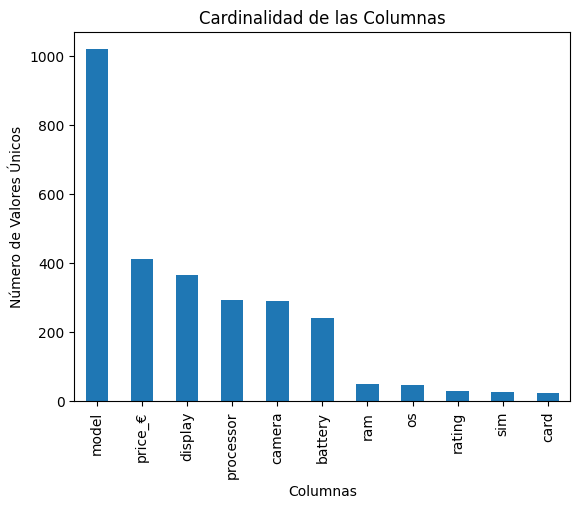

In [28]:
# Visualizamos los datos anteriores por medio de un grafico de barras

cardinalidad.plot(kind='bar')
plt.title('Cardinalidad de las Columnas')
plt.xlabel('Columnas')
plt.ylabel('Número de Valores Únicos')
plt.show()

In [29]:
cardi = pd.DataFrame(columns =['cardinalidad', 'porc_cardi', 'tipo_dato', 'val_unicos', 'tipo_variable'], index= df1.columns)
cardi['cardinalidad'] = [df1[col].nunique() for col in df1.columns]
cardi['porc_cardi'] = cardi['cardinalidad']/len(df1)*100
cardi['tipo_dato'] = df1.dtypes
cardi['val_unicos'] = [df1[col].nunique() if df1[col].nunique()<=15 else 'VNR' for col in df1.columns]
cardi

,cardinalidad,porc_cardi,tipo_dato,val_unicos,tipo_variable
model,1020,100.000000,object,VNR,NaN
rating,30,2.941176,float64,VNR,NaN
sim,28,2.745098,object,VNR,NaN
processor,292,28.627451,object,VNR,NaN
ram,50,4.901961,object,VNR,NaN
battery,242,23.725490,object,VNR,NaN
display,366,35.882353,object,VNR,NaN
camera,291,28.529412,object,VNR,NaN
card,24,2.352941,object,VNR,NaN
os,48,4.705882,object,VNR,NaN


In [30]:
variables_numericas = ['price_€', 'rating']
variables_categoricas = ['model', 'sim', 'processor', 'ram', 'battery', 'display', 'camera', 'card', 'os']

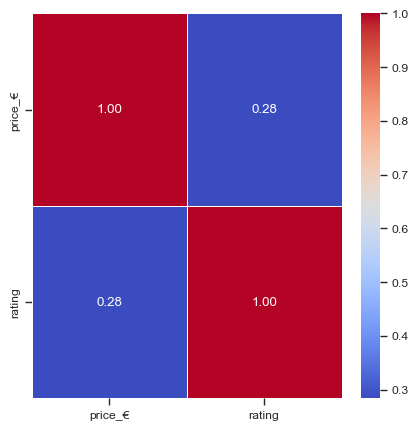

In [894]:
# Matriz y grafico (heatmap) de correlacion entre variables numericas

matriz_correlacion = df1[variables_numericas].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

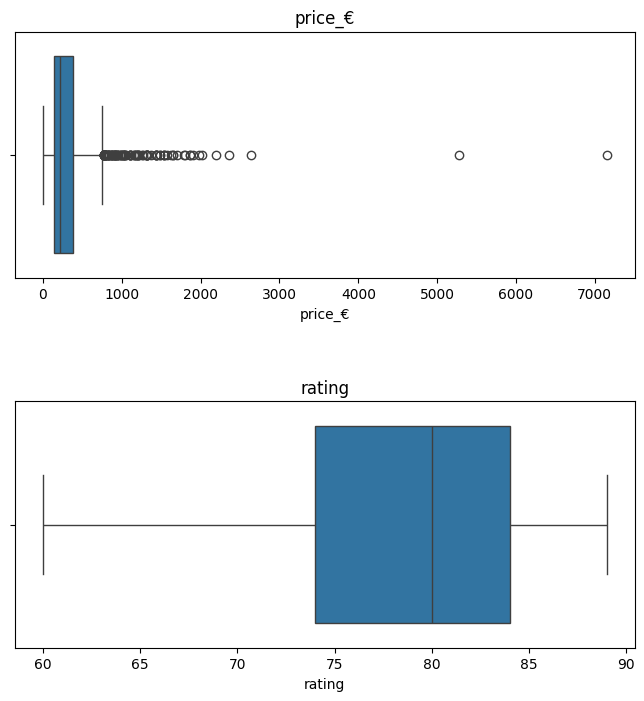

In [31]:
# Observaremos si hay valores atipicos en las dos variables numericas

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(variables_numericas):
    sns.boxplot(x=col, data=df1, ax=ax[i])
    ax[i].set_title(col)

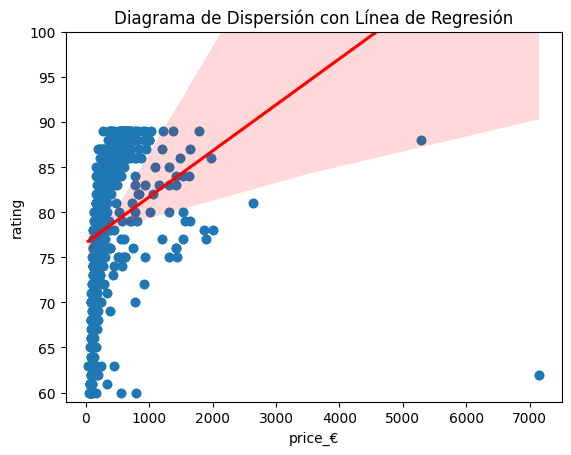

In [32]:
plt.scatter(df1['price_€'], df1['rating'])
plt.title('Diagrama de Dispersión entre Precio y Puntaje')
plt.xlabel('price_€')
plt.ylabel('rating')
sns.regplot(x='price_€', y='rating', data=df1, line_kws={'color': 'red'})
plt.ylim(59, 100)
sns.axes_style()
plt.title('Diagrama de Dispersión con Línea de Regresión')

plt.show()

Esta linea nos muestra la tendencia de los datos analizados, lo que se percibe es una tendencia creciente entre el precio y una mejor puntuacion.

In [33]:
'''HAcemos el reeplazo de algunos de los datos de la variable 'os' que resultaros despues de realizar el ajuste de valores por variable.
para reemplazar estos datos utilizamos la moda de la variable.
'''
os_valores_reemplazar = ['Browser', 'No Wifi', 'Dual Display', 'Foldable Display, Dual Display', 'No 3G', 'Bluetooth', 'Foldable Display', 
           'RTOS (Series 30+)']
moda_os = df1['os'].mode()[0]
df1['os'] = df1['os'].replace(os_valores_reemplazar, moda_os)
df1['os'] = df1['os'].replace(np.nan, moda_os) #Esta linea de codigo reemplaza los NANs por la moda de la variable

In [34]:
'''HAcemos el reeplazo de algunos de los datos de la variable 'sim' que resultaros despues de realizar el ajuste de valores por variable.
para reemplazar estos datos utilizamos la moda de la variable.
'''
sim_valores_reemplazar = ['Wi-Fi']
moda_sim = df1['sim'].mode()[0]
df1['sim'] = df1['sim'].replace(sim_valores_reemplazar, moda_os)

In [35]:
'''HAcemos el reeplazo de algunos de los datos de la variable 'ram' que resultaros despues de realizar el ajuste de valores por variable.
para reemplazar estos datos utilizamos la moda de la variable.
'''
ram_valores_reemplazar = ['No FM Radio', 'Browser', 'Bluetooth', 'No Wifi']
moda_ram = df1['ram'].mode()[0]
df1['ram'] = df1['ram'].replace(ram_valores_reemplazar, moda_ram)

In [36]:
'''HAcemos el reeplazo de algunos de los datos de la variable 'card' que resultaros despues de realizar el ajuste de valores por variable.
para reemplazar estos datos utilizamos la moda de la variable.
'''
card_valores_reemplazar = ['Foldable Display', 'Foldable Display, Dual Display', 'Dual Display']
moda_card = df1['card'].mode()[0]
df1['card'] = df1['card'].replace(card_valores_reemplazar, moda_card)
df1['card'] = df1['card'].replace(np.nan, moda_card) #Esta linea de codigo reemplaza los NANs por la moda de la variable

In [37]:
'''HAcemos el reeplazo de algunos de los datos de la variable 'battery' que resultaros despues de realizar el ajuste de valores por variable.
para reemplazar estos datos utilizamos la moda de la variable.
'''
battery_valores_reemplazar = ['No FM Radio']
moda_battery = df1['battery'].mode()[0]
df1['battery'] = df1['battery'].replace(battery_valores_reemplazar, moda_battery)

In [38]:
'''HAcemos el reeplazo de algunos de los datos de la variable 'processor' que resultaros despues de realizar el ajuste de valores por variable.
para reemplazar estos datos utilizamos la moda de la variable.
'''
processor_valores_reemplazar = ['Bluetooth', 'No FM Radio', 'No Wifi']
moda_processor = df1['processor'].mode()[0]
df1['processor'] = df1['processor'].replace(processor_valores_reemplazar, moda_processor)
df1['processor'] = df1['processor'].replace(np.nan, moda_processor) #Esta linea de codigo reemplaza los NANs por la moda de la variable

In [39]:
# Creamos columnas con cada una de las caracteristicas de la SIM, como nos devuelve un Boleano, lo cambiamos a un dato numerico entero
df1['sim_dual'] = df1['sim'].str.contains(r'\bDual Sim\b').astype(int)
df1['sim_sing'] = df1['sim'].str.contains(r'\bSingle Sim\b').astype(int)
df1['sim_3G'] = df1['sim'].str.contains(r'\b3G\b').astype(int)
df1['sim_4G'] = df1['sim'].str.contains(r'\b4G\b').astype(int)
df1['sim_5G'] = df1['sim'].str.contains(r'\b5G\b').astype(int)
df1['sim_volte'] = df1['sim'].str.contains(r'\bVoLTE\b').astype(int)
df1['sim_wifi'] = df1['sim'].str.contains(r'\bWi-Fi\b').astype(int)
df1['sim_nfc'] = df1['sim'].str.contains(r'\bNFC\b').astype(int)
df1['sim_irc_bl'] = df1['sim'].str.contains(r'\bIR Blaster\b').astype(int)
df1['sim_vo5g'] = df1['sim'].str.contains(r'\bVo5G\b').astype(int)

# Creamos columnas con cada una de las caracteristicas de la variable 'ram'
df1['ram_'] = df1['ram'].str.extract(r'(\d+)\s*(?:GB|MB)\s*RAM', expand=True).astype(float)
df1['ram_'] = df1['ram_'].apply(lambda x: gigas_a_megas(x))
    
df1['memory_int'] = df1['ram'].str.extract(r',\s*([^,]+)\sinbuilt', expand=True).astype(str)
df1['memory_int(MB)']=df1['memory_int'].apply(lambda x: convertir_a_MB(x))

# Creamos columnas con cada una de las caracteristicas de la variable 'processor'
df1[['proc_nombre', 'proc_nucleos', 'proc_velocidad']] = df1['processor'].apply(extraer_info)

# Creamos columnas con cada una de las caracteristicas de la variable 'battery'
df1['battery_mAh'] = df1['battery'].str.extract(r'(\d+)\s*mAh').astype(float)
df1['battery_w'] = df1['battery'].str.extract(r'(\d+)\s*W').astype(float)

# Creamos columnas con cada una de las caracteristicas de la variable 'display'
df1['display_inch'] = df1['display'].str.extract(r'(\d+\.\d+|\d+) inches').astype(float)
df1['display_px'] = df1['display'].str.extract(r'(\d+\s*x\s*\d+)')
df1['display_hz'] = df1['display'].str.extract(r'(\d+) Hz').astype(float)

# Creamos columnas con cada una de las caracteristicas de la variable 'camera'
df1['camera_princ'] = df1['camera'].str.extract(r'(.+?)\s*&')
df1['camera_front'] = df1['camera'].str.extract(r'[&]\s*(\d+\s*MP\s*[+]?.*Front\s*Camera)')

# Creamos columnas con cada una de las caracteristicas de la variable 'os'
df1['os_nombre'] = df1['os'].str.extract(r'^([^\s]+)')


In [40]:
df1.head()

,model,rating,sim,processor,ram,battery,display,camera,card,os,price_€,sim_dual,sim_sing,sim_3G,sim_4G,sim_5G,sim_volte,sim_wifi,sim_nfc,sim_irc_bl,sim_vo5g,ram_,memory_int,memory_int(MB),proc_nombre,proc_nucleos,proc_velocidad,battery_mAh,battery_w,display_inch,display_px,display_hz,camera_princ,camera_front,os_nombre
0,OnePlus 11 5G,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,604.989,1,0,1,1,1,1,1,1,0,0,12288.0,256 GB,262144.0,Snapdragon 8 Gen2,Octa Core,3.2 GHz,5000.0,100.0,6.70,1440 x 3216,120.0,50 MP + 48 MP + 32 MP Triple Rear,16 MP Front Camera,Android
1,OnePlus Nord CE 2 Lite 5G,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,219.879,1,0,1,1,1,1,1,0,0,0,6144.0,128 GB,131072.0,Snapdragon 695,Octa Core,2.2 GHz,5000.0,33.0,6.59,1080 x 2412,120.0,64 MP + 2 MP + 2 MP Triple Rear,16 MP Front Camera,Android
2,Samsung Galaxy A14 5G,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,181.489,1,0,1,1,1,1,1,0,0,0,4096.0,64 GB,65536.0,Exynos 1330,Octa Core,2.4 GHz,5000.0,15.0,6.60,1080 x 2408,90.0,50 MP + 2 MP + 2 MP Triple Rear,13 MP Front Camera,Android
3,Motorola Moto G62 5G,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,164.989,1,0,1,1,1,1,1,0,0,0,6144.0,128 GB,131072.0,Snapdragon 695,Octa Core,2.2 GHz,5000.0,NaN,6.55,1080 x 2400,120.0,50 MP + 8 MP + 2 MP Triple Rear,16 MP Front Camera,Android
4,Realme 10 Pro Plus,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,274.989,1,0,1,1,1,1,1,0,0,0,6144.0,128 GB,131072.0,Dimensity 1080,Octa Core,2.6 GHz,5000.0,67.0,6.70,1080 x 2412,120.0,108 MP + 8 MP + 2 MP Triple Rear,16 MP Front Camera,Android


### Análisis Univariante 

In [41]:
df1.columns

Index(['model', 'rating', 'sim', 'processor', 'ram', 'battery', 'display',
       'camera', 'card', 'os', 'price_€', 'sim_dual', 'sim_sing', 'sim_3G',
       'sim_4G', 'sim_5G', 'sim_volte', 'sim_wifi', 'sim_nfc', 'sim_irc_bl',
       'sim_vo5g', 'ram_', 'memory_int', 'memory_int(MB)', 'proc_nombre',
       'proc_nucleos', 'proc_velocidad', 'battery_mAh', 'battery_w',
       'display_inch', 'display_px', 'display_hz', 'camera_princ',
       'camera_front', 'os_nombre'],
      dtype='object')

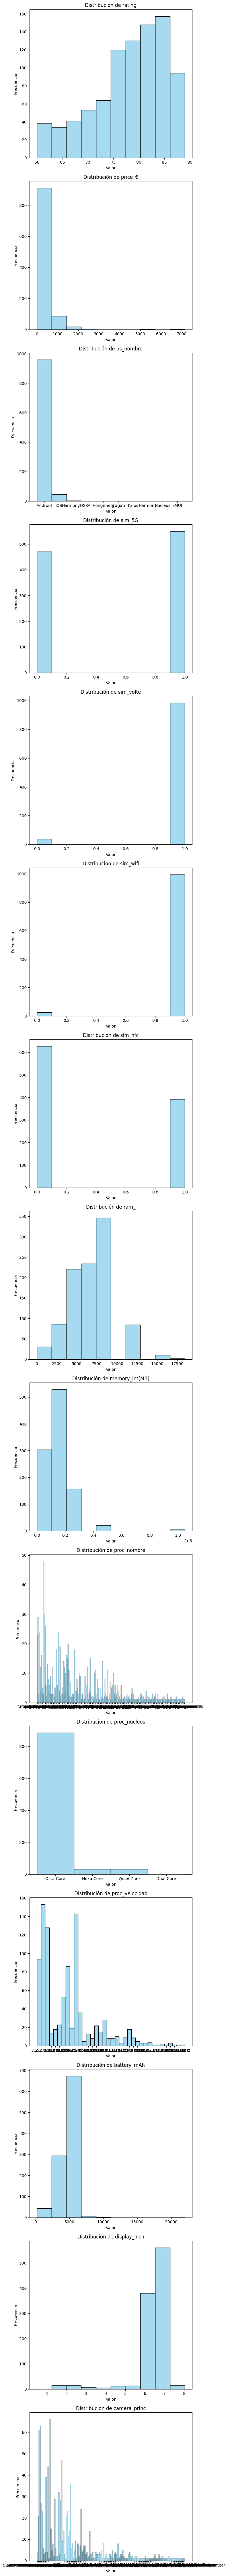

In [42]:
# Obtener la lista de las columnas mas representativas en el DataFrame
columnas = ['rating', 'price_€', 'os_nombre', 'sim_5G', 'sim_volte', 'sim_wifi', 'sim_nfc', 'ram_', 'memory_int(MB)', 'proc_nombre', 
            'proc_nucleos', 'proc_velocidad', 'battery_mAh', 'display_inch', 'camera_princ']

# Configurar la disposición de subgráficos
fig, axs = plt.subplots(nrows=len(columnas), figsize=(8, 6 * len(columnas)))

# Iterar sobre las columnas y crear histogramas
for i, columna in enumerate(columnas):
    sns.histplot(df1[columna], bins=10, kde=False, color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_title(f'Distribución de {columna}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

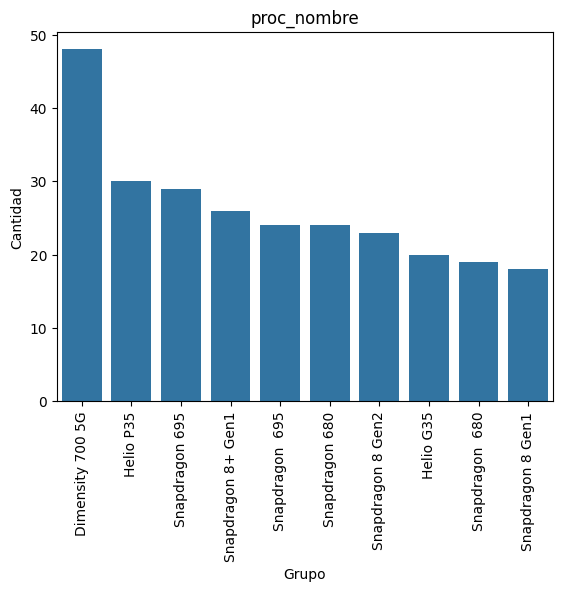

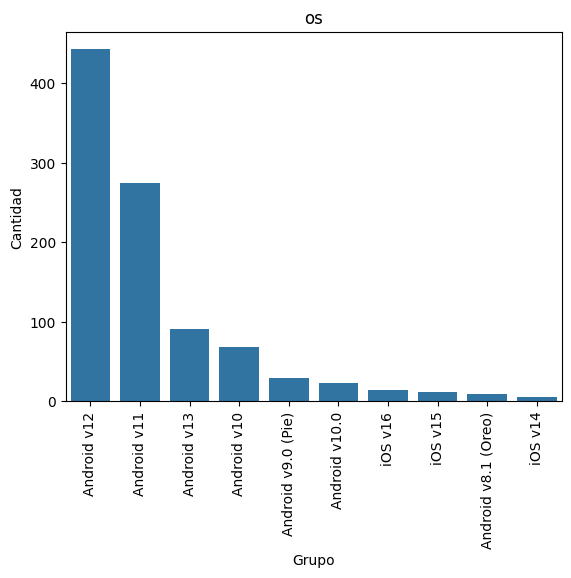

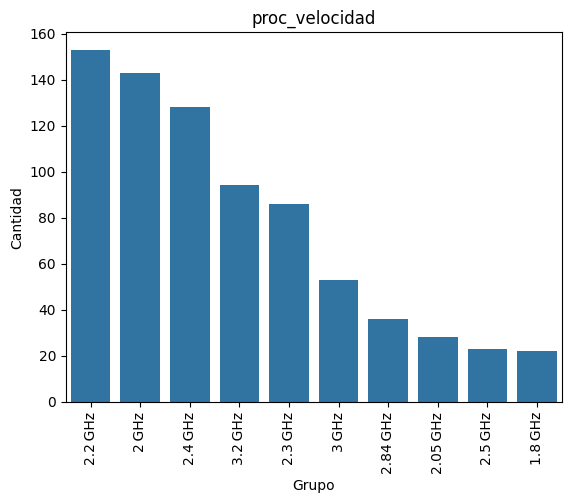

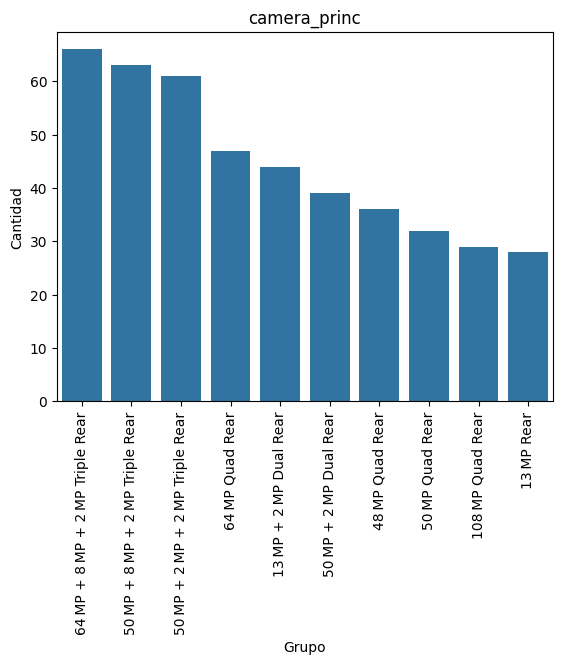

In [43]:
'''con el objetivo de hacer una visualizacion de cada una de las variables, para algunas variables he
priorizado los 10 valores mas repetidos de cada una para realizar una observacion mas limpia.

['model', 'rating', 'sim', 'processor', 'ram', 'battery', 'display',
       'camera', 'card', 'os', 'price_€', 'sim_dual', 'sim_sing', 'sim_3G',
       'sim_4G', 'sim_5G', 'sim_volte', 'sim_wifi', 'sim_nfc', 'sim_irc_bl',
       'sim_vo5g', 'ram_', 'memory_int', 'memory_int(MB)', 'proc_nombre',
       'proc_nucleos', 'proc_velocidad', 'battery_mAh', 'battery_w',
       'var', 'display_px', 'display_hz', 'camera_princ',
       'camera_front']
'''
var_t10 = df1['proc_nombre'].value_counts().head(10)
df_top_10 = df1[df1['proc_nombre'].isin(var_t10)]

sns.barplot(x=var_t10.index, y=var_t10.values)
plt.title('proc_nombre')
plt.xlabel('Grupo')
plt.xticks(rotation='vertical')
plt.ylabel('Cantidad')
plt.show()


var_t10 = df1['os'].value_counts().head(10)
df_top_10 = df1[df1['os'].isin(var_t10)]

sns.barplot(x=var_t10.index, y=var_t10.values)
plt.title('os')
plt.xlabel('Grupo')
plt.xticks(rotation='vertical')
plt.ylabel('Cantidad')
plt.show()


var_t10 = df1['proc_velocidad'].value_counts().head(10)
df_top_10 = df1[df1['proc_velocidad'].isin(var_t10)]

sns.barplot(x=var_t10.index, y=var_t10.values)
plt.title('proc_velocidad')
plt.xlabel('Grupo')
plt.xticks(rotation='vertical')
plt.ylabel('Cantidad')
plt.show()

var_t10 = df1['camera_princ'].value_counts().head(10)
df_top_10 = df1[df1['camera_princ'].isin(var_t10)]

sns.barplot(x=var_t10.index, y=var_t10.values)
plt.title('camera_princ')
plt.xlabel('Grupo')
plt.xticks(rotation='vertical')
plt.ylabel('Cantidad')
plt.show()



### Análisis Bivariante

In [44]:
columnas = ['rating', 'price_€', 'os', 'sim_5G', 'sim_volte', 'sim_wifi', 'sim_nfc', 'ram_', 'memory_int(MB)', 'proc_nombre', 
            'proc_nucleos', 'proc_velocidad', 'battery_mAh', 'display_inch', 'camera_princ']

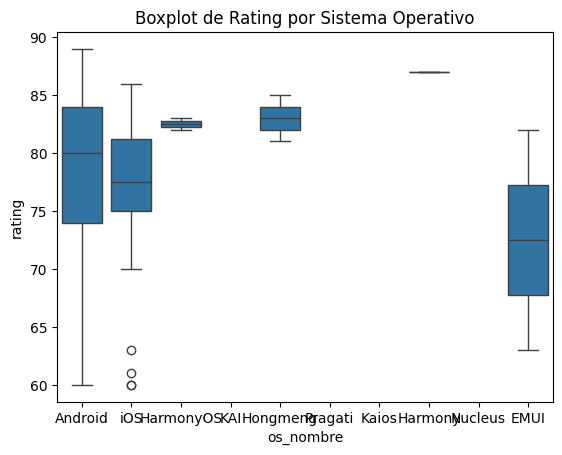

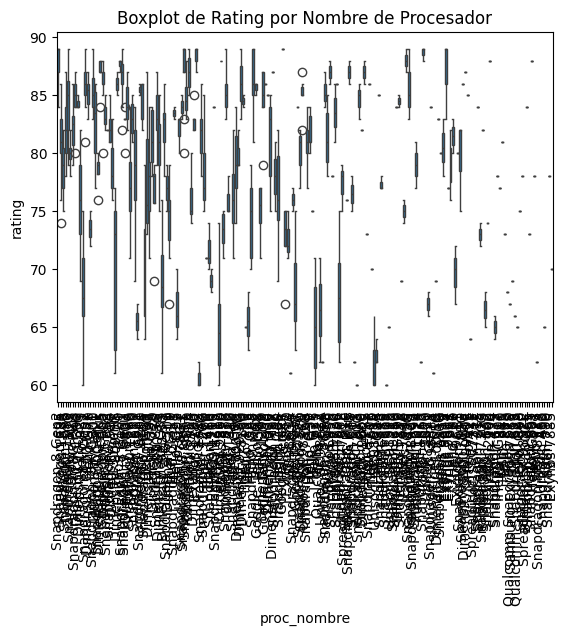

In [45]:
sns.boxplot(x='os_nombre', y='rating', data=df1)
plt.title('Boxplot de Rating por Sistema Operativo')
plt.show()

sns.boxplot(x='proc_nombre', y='rating', data=df1)
plt.title('Boxplot de Rating por Nombre de Procesador')
plt.xticks(rotation='vertical')
plt.show()


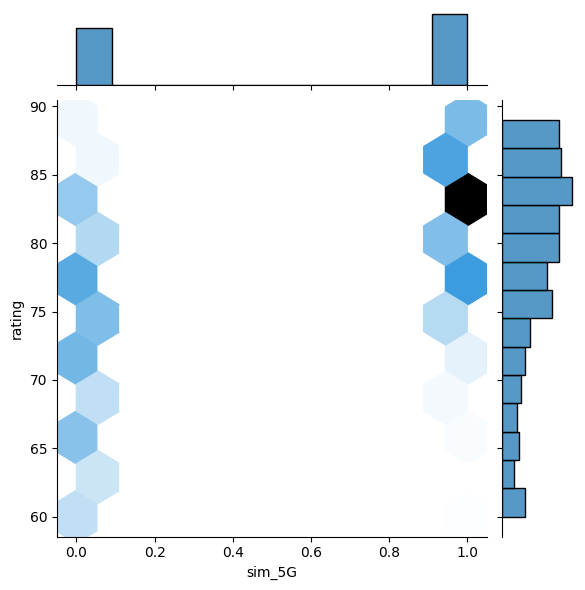

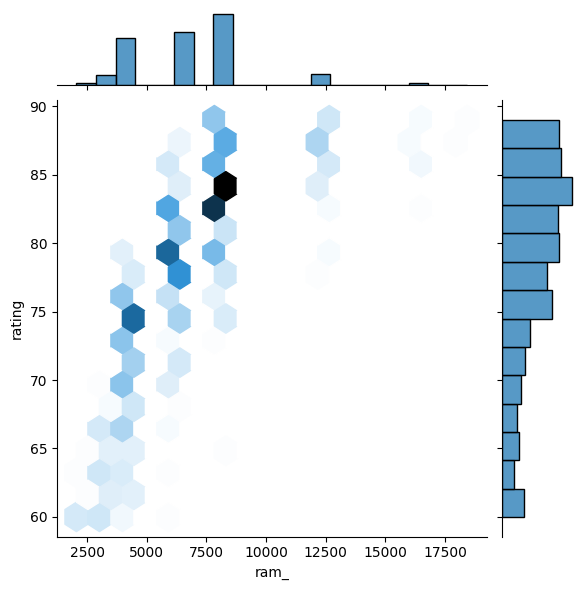

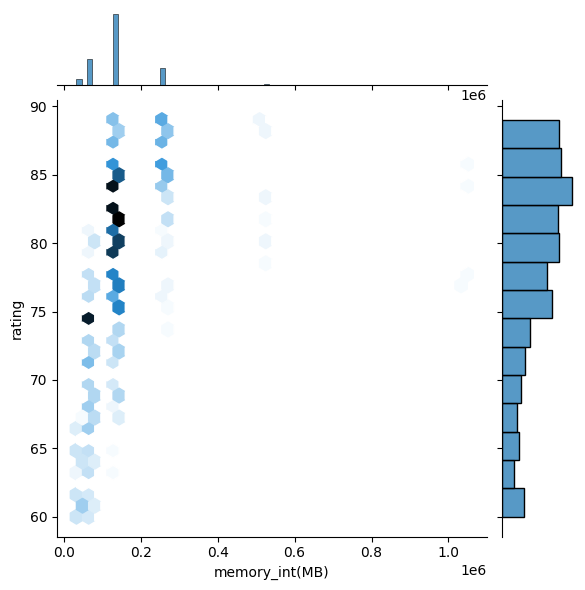

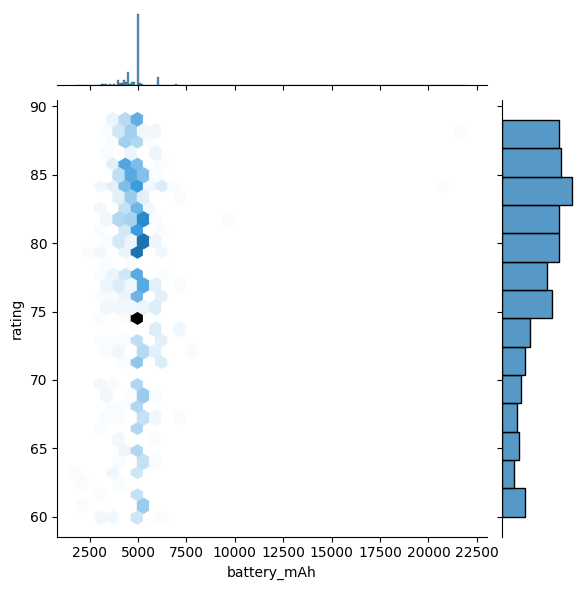

In [46]:
sns.jointplot(data=df1, x='sim_5G', y='rating', kind='hex');
plt.show()
sns.jointplot(data=df1, x='ram_', y='rating', kind='hex');
plt.show()
sns.jointplot(data=df1, x='memory_int(MB)', y='rating', kind='hex');
plt.show()
sns.jointplot(data=df1, x='battery_mAh', y='rating', kind='hex');
plt.show()

### OLS

#### Intentaremos predecir los datos faltantes de la columna 'rating', utilizando el modelo OLS de Statsmodels

In [47]:
df1_numericas = df1.select_dtypes(exclude=['object'])
df1_numericas.to_csv('df1_numericas.csv', index=False)
df1_numericas

,rating,price_€,sim_dual,sim_sing,sim_3G,sim_4G,sim_5G,sim_volte,sim_wifi,sim_nfc,sim_irc_bl,sim_vo5g,ram_,memory_int(MB),battery_mAh,battery_w,display_inch,display_hz
0,89.0,604.989,1,0,1,1,1,1,1,1,0,0,12288.0,262144.0,5000.0,100.0,6.70,120.0
1,81.0,219.879,1,0,1,1,1,1,1,0,0,0,6144.0,131072.0,5000.0,33.0,6.59,120.0
2,75.0,181.489,1,0,1,1,1,1,1,0,0,0,4096.0,65536.0,5000.0,15.0,6.60,90.0
3,81.0,164.989,1,0,1,1,1,1,1,0,0,0,6144.0,131072.0,5000.0,NaN,6.55,120.0
4,82.0,274.989,1,0,1,1,1,1,1,0,0,0,6144.0,131072.0,5000.0,67.0,6.70,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,83.0,384.890,1,0,1,1,1,1,1,0,0,0,8192.0,131072.0,5000.0,2.0,6.67,120.0
1016,75.0,164.890,1,0,1,1,1,1,1,0,0,0,6144.0,131072.0,5000.0,5.0,6.50,NaN
1017,85.0,318.890,1,0,1,1,1,1,1,1,1,0,8192.0,262144.0,5080.0,67.0,6.60,144.0
1018,80.0,219.890,1,0,1,1,1,1,1,1,0,0,6144.0,131072.0,5000.0,NaN,6.80,NaN


In [48]:
df1_numericas.isna().sum()/len(df1_numericas)*100

rating            13.823529
price_€            0.000000
sim_dual           0.000000
sim_sing           0.000000
sim_3G             0.000000
sim_4G             0.000000
sim_5G             0.000000
sim_volte          0.000000
sim_wifi           0.000000
sim_nfc            0.000000
sim_irc_bl         0.000000
sim_vo5g           0.000000
ram_               0.490196
memory_int(MB)     0.490196
battery_mAh        0.000000
battery_w         23.431373
display_inch       0.000000
display_hz        40.000000
dtype: float64

In [49]:
modaMB = df1['memory_int(MB)'].mode()[0]
modaram_ = df1['ram_'].mode()[0]

In [50]:
df1_numericas['memory_int(MB)'].replace(np.nan, modaMB, inplace=True)
df1_numericas['ram_'].replace(np.nan, modaram_, inplace=True)

Las nuevas variables 'battery_w' y 'display_hz' no se tendran en cuenta para el analisis, esto debido a que tienen un gran numero de NaNs 
producto del contenido de los valores que tomaron de las variables de origen, las cuales no tenian especificado el valor que debia asignarse.
Las variables de origen de estas dos variables resultantes tenian dos datos numericos que a mi parecer era importante tener en cuenta al
momento de segmentarlas, pero muchas de ellas carecian del segundo valor numerico, por lo que al no encontrarse se generaba un valor NaN.

In [52]:
df1_numericas = df1_numericas.drop(columns=['battery_w', 'display_hz'])

In [53]:
# Ahora vamos a dividir el dataset: uno con valores NaN y el otro con datos completos. 

df1_numericas_con_nan = df1_numericas[df1_numericas.isnull().any(axis=1)]
df1_numericas_sin_nan = df1_numericas[df1_numericas.notnull().all(axis=1)]

In [54]:
df1_numericas_sin_nan

,rating,price_€,sim_dual,sim_sing,sim_3G,sim_4G,sim_5G,sim_volte,sim_wifi,sim_nfc,sim_irc_bl,sim_vo5g,ram_,memory_int(MB),battery_mAh,display_inch
0,89.0,604.989,1,0,1,1,1,1,1,1,0,0,12288.0,262144.0,5000.0,6.70
1,81.0,219.879,1,0,1,1,1,1,1,0,0,0,6144.0,131072.0,5000.0,6.59
2,75.0,181.489,1,0,1,1,1,1,1,0,0,0,4096.0,65536.0,5000.0,6.60
3,81.0,164.989,1,0,1,1,1,1,1,0,0,0,6144.0,131072.0,5000.0,6.55
4,82.0,274.989,1,0,1,1,1,1,1,0,0,0,6144.0,131072.0,5000.0,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,83.0,384.890,1,0,1,1,1,1,1,0,0,0,8192.0,131072.0,5000.0,6.67
1016,75.0,164.890,1,0,1,1,1,1,1,0,0,0,6144.0,131072.0,5000.0,6.50
1017,85.0,318.890,1,0,1,1,1,1,1,1,1,0,8192.0,262144.0,5080.0,6.60
1018,80.0,219.890,1,0,1,1,1,1,1,1,0,0,6144.0,131072.0,5000.0,6.80


In [55]:
df1_numericas_con_nan

,rating,price_€,sim_dual,sim_sing,sim_3G,sim_4G,sim_5G,sim_volte,sim_wifi,sim_nfc,sim_irc_bl,sim_vo5g,ram_,memory_int(MB),battery_mAh,display_inch
14,NaN,1264.890,1,0,1,1,1,1,1,1,0,1,8192.0,262144.0,5000.0,6.80
29,NaN,769.989,1,0,1,1,1,1,1,1,0,0,8192.0,131072.0,4500.0,6.70
37,NaN,1011.989,1,0,1,1,1,1,1,1,0,0,12288.0,262144.0,5000.0,6.80
49,NaN,472.989,1,0,1,1,1,1,1,1,0,0,8192.0,131072.0,5000.0,6.70
69,NaN,1099.890,1,0,1,1,1,1,1,1,0,0,8192.0,262144.0,5000.0,7.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,NaN,148.390,1,0,1,1,0,1,1,0,0,0,3072.0,16384.0,2730.0,5.20
1000,NaN,21.989,1,0,0,0,0,0,0,0,0,0,32.0,32.0,800.0,1.77
1003,NaN,76.989,1,0,1,1,0,1,1,0,0,0,3072.0,32768.0,4000.0,6.50
1012,NaN,52.657,1,0,1,1,0,0,1,0,0,0,2048.0,32768.0,3020.0,5.00


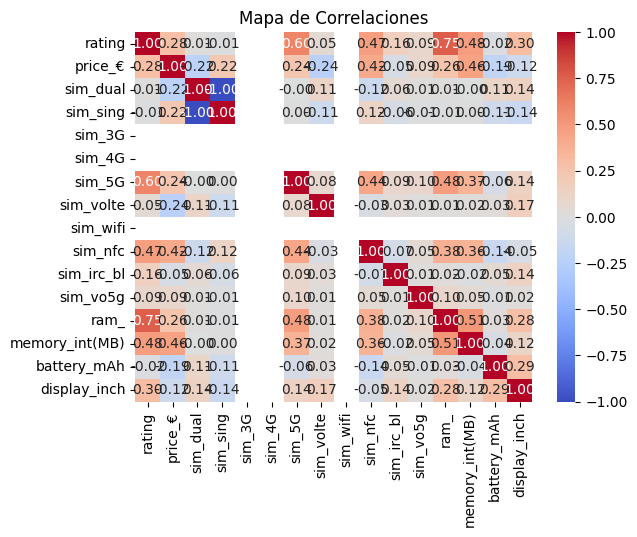

In [56]:
correlation_matrix = df1_numericas_sin_nan.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlaciones')
plt.show()

Llamamos las librerias

In [57]:
import statsmodels.formula.api as smf

In [58]:
df1_numericas

,rating,price_€,sim_dual,sim_sing,sim_3G,sim_4G,sim_5G,sim_volte,sim_wifi,sim_nfc,sim_irc_bl,sim_vo5g,ram_,memory_int(MB),battery_mAh,display_inch
0,89.0,604.989,1,0,1,1,1,1,1,1,0,0,12288.0,262144.0,5000.0,6.70
1,81.0,219.879,1,0,1,1,1,1,1,0,0,0,6144.0,131072.0,5000.0,6.59
2,75.0,181.489,1,0,1,1,1,1,1,0,0,0,4096.0,65536.0,5000.0,6.60
3,81.0,164.989,1,0,1,1,1,1,1,0,0,0,6144.0,131072.0,5000.0,6.55
4,82.0,274.989,1,0,1,1,1,1,1,0,0,0,6144.0,131072.0,5000.0,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,83.0,384.890,1,0,1,1,1,1,1,0,0,0,8192.0,131072.0,5000.0,6.67
1016,75.0,164.890,1,0,1,1,1,1,1,0,0,0,6144.0,131072.0,5000.0,6.50
1017,85.0,318.890,1,0,1,1,1,1,1,1,1,0,8192.0,262144.0,5080.0,6.60
1018,80.0,219.890,1,0,1,1,1,1,1,1,0,0,6144.0,131072.0,5000.0,6.80


Aplicamos el modelo para predecir la variable 'rating', por medio de dos variables predictoras 'ram_' y 'sim_5G' para generar los parametros

In [59]:
linear_model = smf.ols(formula='rating ~ ram_ + sim_5G', data=df1_numericas).fit()
linear_model.params


Intercept    63.878773
ram_          0.001787
sim_5G        4.516756
dtype: float64

Llamamos el dataset al que vamos a aplicar los parametros para imputar los NaNs de la variable 'rating'

In [60]:
df1_numericas_con_nan

,rating,price_€,sim_dual,sim_sing,sim_3G,sim_4G,sim_5G,sim_volte,sim_wifi,sim_nfc,sim_irc_bl,sim_vo5g,ram_,memory_int(MB),battery_mAh,display_inch
14,NaN,1264.890,1,0,1,1,1,1,1,1,0,1,8192.0,262144.0,5000.0,6.80
29,NaN,769.989,1,0,1,1,1,1,1,1,0,0,8192.0,131072.0,4500.0,6.70
37,NaN,1011.989,1,0,1,1,1,1,1,1,0,0,12288.0,262144.0,5000.0,6.80
49,NaN,472.989,1,0,1,1,1,1,1,1,0,0,8192.0,131072.0,5000.0,6.70
69,NaN,1099.890,1,0,1,1,1,1,1,1,0,0,8192.0,262144.0,5000.0,7.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,NaN,148.390,1,0,1,1,0,1,1,0,0,0,3072.0,16384.0,2730.0,5.20
1000,NaN,21.989,1,0,0,0,0,0,0,0,0,0,32.0,32.0,800.0,1.77
1003,NaN,76.989,1,0,1,1,0,1,1,0,0,0,3072.0,32768.0,4000.0,6.50
1012,NaN,52.657,1,0,1,1,0,0,1,0,0,0,2048.0,32768.0,3020.0,5.00


Aplicamos los parametros a las variables predictoras para generar las predicciones de la variable

In [61]:
df1_numericas_con_nan.loc[:, 'rating'] = df1_numericas_con_nan['ram_']*0.001787 + df1_numericas_con_nan['sim_5G']*4.516756 + 63.878773
df1_numericas_con_nan

,rating,price_€,sim_dual,sim_sing,sim_3G,sim_4G,sim_5G,sim_volte,sim_wifi,sim_nfc,sim_irc_bl,sim_vo5g,ram_,memory_int(MB),battery_mAh,display_inch
14,83.034633,1264.890,1,0,1,1,1,1,1,1,0,1,8192.0,262144.0,5000.0,6.80
29,83.034633,769.989,1,0,1,1,1,1,1,1,0,0,8192.0,131072.0,4500.0,6.70
37,90.354185,1011.989,1,0,1,1,1,1,1,1,0,0,12288.0,262144.0,5000.0,6.80
49,83.034633,472.989,1,0,1,1,1,1,1,1,0,0,8192.0,131072.0,5000.0,6.70
69,83.034633,1099.890,1,0,1,1,1,1,1,1,0,0,8192.0,262144.0,5000.0,7.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,69.368437,148.390,1,0,1,1,0,1,1,0,0,0,3072.0,16384.0,2730.0,5.20
1000,63.935957,21.989,1,0,0,0,0,0,0,0,0,0,32.0,32.0,800.0,1.77
1003,69.368437,76.989,1,0,1,1,0,1,1,0,0,0,3072.0,32768.0,4000.0,6.50
1012,67.538549,52.657,1,0,1,1,0,0,1,0,0,0,2048.0,32768.0,3020.0,5.00
